<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> [MAT281] Proyecto final: Aplicaciones de las matemáticas a la ingeniería</h1>
<h2 align='center'> Conjunto de datos: "DARWIN" - Grupo 2</h2>
<hr style="height:2px;border:none"/>

<p style="text-align: center;">
    <img src="https://github.com/Darkrayyss/Proyecto-Final-MAT281/raw/307f0d0f14aefbff8de7698d0c645d680ced6994/Carpet%20for%20Test%201/images/Capy2.png" alt="Capybara trabajando" width="500" style="border: 7px solid black;">
    <br>
    <small>Título de la imagen: Capybara trabajando</small>
</p>

**Nombre del Conjunto de Datos:** DARWIN

**Objetivo del Conjunto de Datos:** El conjunto de datos DARWIN fue creado con el propósito de permitir a los investigadores mejorar las metodologías de aprendizaje automático para la predicción de la enfermedad de Alzheimer a través del análisis de la escritura a mano. La tarea principal es clasificar a los participantes en dos categorías: pacientes con enfermedad de Alzheimer (AD) y personas sanas (Saludable).

**Características Clave del Conjunto de Datos:**
- Número de Participantes: Un total de 174 participantes.
   - 89 pacientes con enfermedad de Alzheimer (AD).
   - 85 personas sanas (Saludable).
- Estructura del Archivo "DARWIN.csv":
   - 452 columnas en total.
   - La primera columna contiene identificadores de participantes.
   - La última columna indica la clase a la que pertenece cada participante ('P' para Paciente o 'H' para Saludable).
   - Las columnas intermedias almacenan características extraídas de 25 tareas específicas, con 18 características por tarea.

**Datos Faltantes:** No existen valores faltantes en el conjunto de datos.

**Referencias Relacionadas:**
- [1] Artículo titulado "An experimental protocol to support cognitive impairment diagnosis by using handwriting analysis" in Procedia Computer Science (2018).
- [2] Artículo titulado "Diagnosing Alzheimer’s disease from online handwriting: A novel dataset and performance benchmarking" in Engineering Applications of Artificial Intelligence (2022).

**Para más información acerca de las covariables, el experimento realizado para obtener las mediciones y los objetivos** pensandos para el trabajo incialmente, dirigase al árticulo *Diagnosing Alzheimer’s disease from on-line handwriting A novel dataset* [2].

In [7]:
# Libraries for data handling and operations.
import pandas as pd
import numpy as np

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Visualization libraries.
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# URL of the CSV file
url = "https://raw.githubusercontent.com/Darkrayyss/Proyecto-Final-MAT281/55f75c4cf69c747fb155083ee56757f04078ad7c/Docs/darwin/data.csv"

# Import the CSV file into a DataFrame
df = pd.read_csv(url)

# Drop the Id
df.drop('ID', axis=1, inplace=True)

# Now, 'df' contains the data from the CSV file
df.head(5)

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [10]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 451 entries, air_time1 to class
dtypes: float64(300), int64(150), object(1)
memory usage: 613.2+ KB


Se decide eliminar la columna de "Id" dado que resulta redundante con el índice del dataframe.

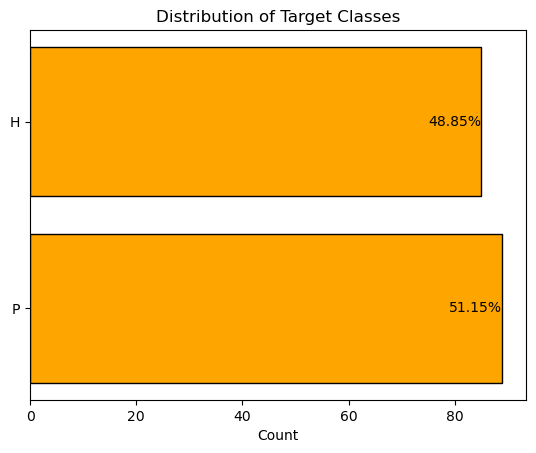

In [11]:
# Select the last row of the DataFrame
last_row = df.iloc[:, -1]

# Count the unique values in the last row (assuming it contains the target class)
unique_values = last_row.value_counts()

# Get the categories and values from the unique values
categories = unique_values.index
values = unique_values.values

# Calculate the total count
total_count = values.sum()

# Calculate the percentages
percentages = (values / total_count) * 100

# Create the horizontal histogram with specified colors, border, and percentages inside the bars
fig, ax = plt.subplots()
bars = plt.barh(categories, values, color='orange', edgecolor='black')
plt.xlabel('Count')
plt.title('Distribution of Target Classes')

# Add percentages inside the bars
for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_width() - 10, bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', color='black', va='center')

plt.show()

Se observa que las clases se encuentran balanceadas respecto a las observaciones.